In [1]:
import workbook10_utils as wb10
from workbook10_utils import Maze,CandidateSolution, evaluate, displaySearchState, IsAtGoal
import matplotlib.pyplot as plt
import copy
import numpy as np
from time import sleep
from IPython.display import clear_output
%matplotlib inline

In [2]:
def getNextItemForAlgorithm(algorithm,openList):
    next = -1
    numEntries = len(openList)
    #check openList is not empty
    if  ( numEntries == 0 ):
        print("openList was empty!")

    else:
    
        if algorithm=="depthFirst":
            # return last thing added
            next = len(openList) -1
            
        elif algorithm =="breadthFirst":
            #return oldest thing on list
            next = 0
            
        elif algorithm == "bestFirst" or algorithm=="localSearch":
            #loop through list looking for entry with highest quality
            best = 0
            for pos in range(1, (numEntries -1)):
                if (openList[pos].quality < openList[best].quality) :
                    best = pos
            next =  best
            
        elif algorithm == "Astar":
            #loop through list lookinmg for item with lowest sum of estimated distance ot goal + number of moves from start
            best = 0
            for pos in range(1, (numEntries -1)):
                if ( openList[pos].quality +len(openList[pos].variableValues) < ( openList[best].quality +len(openList[best].variableValues))):
                    best = pos
            next =  best 
            
        elif algorithm == "dijkstra":
            #loop through lsit looking for one thathas taken fewest moves from start
            best = 0
            for pos in range(1, (numEntries -1)):
                if ( len(openList[pos].variableValues) < len(openList[best].variableValues)):
                    best = pos
            next =  best 
            
        else:
            print("unrecognised algorithm")
                             
    return next

In [ ]:


#do we want to get lots of printouts?
verbose= False
showMazeUpdates = True



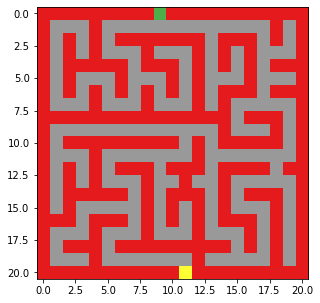

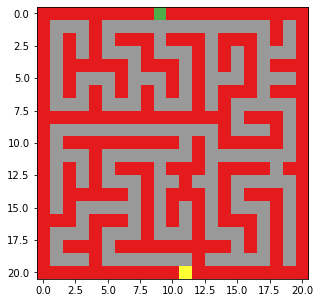

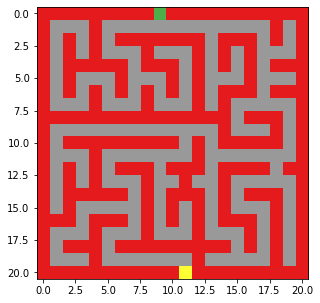

In [12]:
maze = Maze()
maze.loadFromTxt("maze.txt")
maze.setStart(0,9)
maze.setGoal(20,11)

maze.showMaze()

#this is an example of how to make a hole in a wall
#in this case jsut below the entrance 
#x is for columns, y for rows
maze.contents[2][9] = 1
maze.showMaze()

# and this turns a path into a wall
#using the same cell
maze.contents[2][9] = 0
maze.showMaze()


#define the amount to add to the previous cellid for each move
# can only do this once the maze has been read in so we know how big it is!
leftMove = -1
rightMove = 1
upMove = - (maze.lastColumnId)
downMove = (maze.lastColumnId)
# define the set of move so we can iterate through them
moveSet = [leftMove,rightMove, upMove,downMove]
if(verbose):
    print("moveSet is" + str(moveSet))

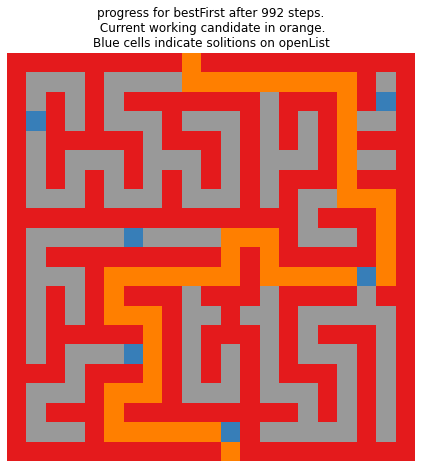

Using algorithm bestFirst, goal was found after 992 tests with length 59:


In [14]:

# initialisation
workingCandidate = CandidateSolution()
#get start position on maze and set this as start for search
workingCandidate.variableValues.append(maze.start)

#measure quality
workingCandidate.quality = evaluate(workingCandidate,maze)

#check for lucky guess
if(workingCandidate.quality ==100.0):
    print("solution found")
    atGoal = True
else:
    openList = []
    closedList = []
    openList.append(workingCandidate)
    atGoal = False
    
# ready to start looking
iteration = 0
maxIterations = 1000
tested = 0

#show first stage
displaySearchState(maze,workingCandidate,openList,algorithm,0)



algorithm = "bestFirst"





#WHILE ( Openlist not empty) DO
while( atGoal==False and  len(openList)>0 and iteration< maxIterations): 

    if(verbose):
        print("Iteration {} there are {} candidates on the openList".format(iteration,len(openList)))
    iteration = iteration + 1
    
    
    #MOVE (chosen item from openList into working candidate)    
    nextItem = getNextItemForAlgorithm(algorithm,openList) 
    workingCandidate = openList.pop(nextItem)
    
    # this is just for the sake of visualisation
    if(showMazeUpdates):
        displaySearchState(maze, workingCandidate,openList,algorithm,tested)

    
    #FOREACH (1-step neighbour)
    for move in moveSet:         
        ## Generate ##
        ## need to make a deep copy so we can change it
        neighbour = copy.deepcopy(workingCandidate)  
        #neighbour = ApplyMoveOperator(workingCandidate)
        lastCell = neighbour.variableValues [ -1] # neat bit of python indexing that returns last item in list
        nextCell = lastCell + move
        neighbour.variableValues.append(nextCell) 
        
        ## Test ## 
        reason = evaluate(neighbour,maze)
        tested += 1
 
        #IF AT GOAL OUTPUT (SUCCESS, neighbour)
        if(IsAtGoal(neighbour, maze)):             
            displaySearchState(maze,neighbour,openList,algorithm,tested)
            print('Using algorithm {}, goal was found after {} tests with length {}:'.format(algorithm,tested,len(neighbour.variableValues)))

            atGoal=True
            break ##takes us out of for loop
            
         ## update Working Memory ##
          
        elif (neighbour.quality>=0): #neighbour is feasible
            newx,newy = maze.cellidToCoords(neighbour.variableValues[-1])
            if(verbose):
                print("    adding partial solution moving to:{},{}".format(newx,newy))
            openList.append(neighbour) 
        else: #neighbour is infeasible
            if(verbose):
                print("    discarding invalid solution because "+reason)
            closedList.append(neighbour)
 
    ##COPY (working candidate to closedList)
    closedList.append(workingCandidate)

##OUTPUT (FAILURE, workingCandidate)
if(atGoal==False):
    print('failed to find solution to the problem in the time allowed!')    